Ukupno imamo 25010 podataka za treniranje

In [1]:
import numpy as np
import unicodecsv
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

df = pd.read_csv('poker_training_data.csv',delimiter=',')


In [3]:
#df['Poker_hand']-> smo stavili da uzima samo zadnji stupac i u njemu provjerava i zbraja

number_ph=[]
for i in range(10):
    number_ph.append(df['Poker_hand'][df.Poker_hand==i].count())

In [4]:
number_ph

[12493, 10599, 1206, 513, 93, 54, 36, 6, 5, 5]

u niz number_ph spremamo koliko puta se koja 'poker_hands' pojavila prilikom 25010 djeljenja. Npr. poker_ruka 6(Full house) pojavila se 36 puta. Vidimo što je veći indeks, poker ruka je jača, to je manji njen broj pojavljivanja.
Suma svih elemenata unutar number_ph je 25010=broj instanci za testiranje, broj djeljenja

In [5]:
probabilty_ph=(df['Poker_hand'].value_counts(normalize=True) * 100).tolist()

In [6]:
probabilty_ph

[49.95201919232307,
 42.379048380647745,
 4.8220711715313875,
 2.0511795281887246,
 0.3718512594962015,
 0.21591363454618154,
 0.1439424230307877,
 0.023990403838464614,
 0.019992003198720514,
 0.019992003198720514]

u niz probabilty_ph spremamo vjerojatnosti za svaku od 'poker_hands'. Npr. vjerojatnost da će igrači dobiti full house je manja od 1%. Kao što vidimo što je ruka jača, igrači su je teže dobivali. U skoro 50% situacija igrači nisu imali ništa, automatski su gubili, dok u preko 90% slučajeva nisu imali ništa značajno s čim bi mogli pobjediti(kombinacije najveća karta i par).
U donjem grafikonu su prikazani rezultati testiranja 

<BarContainer object of 10 artists>

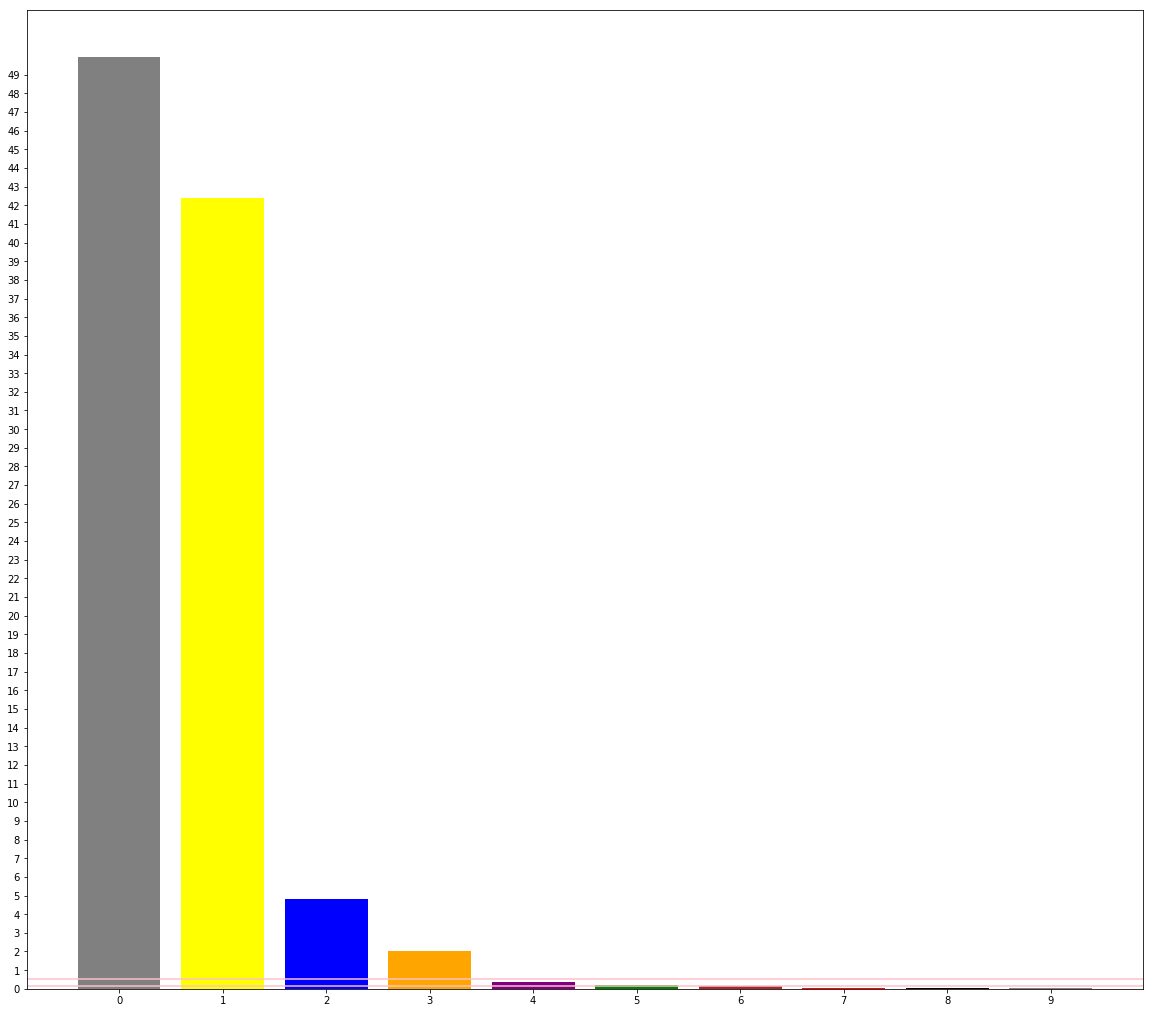

In [74]:
plt.figure(figsize=(20,18))
plt.axhline(y=0.5, color='pink')
plt.axhline(y=0.15, color='pink')
plt.yticks(np.arange(0,50,1))
plt.bar(['0','1','2','3','4','5','6','7','8','9'],height=probabilty_ph,color=['grey','yellow','blue','orange','purple','green','brown','red','black'])

Izbrojat ćemo koliko puta se karte pojavljuju u svakom 'poker_hand'. 
U rječnik dictionary_ph spremamo sve karte koje su se pojavile u određenom 'poker_handu'. 
Uz dictionary_ph imamo još 9 rječnika, za svaku vrstu poker hand, u koji spremamo broj pojavljivanja svake karte. Ključevi su kombinacija tipa i broja karte(npr. kraljica srca je H12), a vrijednost je broj pojavljivanja svake od karata. Ukoliko se karta nije pojavila, njezina vrje 

In [8]:
dictionary_ph={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for i in range(10):
    dictionary_ph[i]=(df[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']][df.Poker_hand==i])#tip data frame 

Metoda 'IzbrojiPojavljivanjeKarata' broji koliko puta se koja karta pojavila u određenoj ruci i to sprema u rječnik

In [97]:
def IzbrojiPojavljivanjeKarata(ph,rj):
    for y in range(len(ph)):
        for x in range(0,10,2):
            k=''
            s=ph.iloc[y,x]
            if(s==1):k+='H'
            elif(s==2):k+='S'
            elif(s==3):k+='D'
            else:k+='C'
            k+=str(ph.iloc[y,x+1])
            
            if(k in rj):
                rj[k]+=1
            else:
                rj.__setitem__(k,1)           

In [109]:
cards_0={}
IzbrojiPojavljivanjeKarata(dictionary_ph[0],cards_0)
cards_1={}
IzbrojiPojavljivanjeKarata(dictionary_ph[1],cards_1)
cards_2={}
IzbrojiPojavljivanjeKarata(dictionary_ph[2],cards_2)
cards_3={}
IzbrojiPojavljivanjeKarata(dictionary_ph[3],cards_3)
cards_4={}
IzbrojiPojavljivanjeKarata(dictionary_ph[4],cards_4)
cards_5={}
IzbrojiPojavljivanjeKarata(dictionary_ph[5],cards_5)
cards_6={}
IzbrojiPojavljivanjeKarata(dictionary_ph[6],cards_6)
cards_7={}
IzbrojiPojavljivanjeKarata(dictionary_ph[7],cards_7)
cards_8={}
IzbrojiPojavljivanjeKarata(dictionary_ph[8],cards_8)
cards_9={}
IzbrojiPojavljivanjeKarata(dictionary_ph[9],cards_9)

In [116]:
karte=[(len(cards_0)/52)*100,len(cards_1)/52,len(cards_2)/52,len(cards_3)/52,len(cards_4)/52,len(cards_5)/52,len(cards_6)/52,len(cards_7)/52,len(cards_8)/52,len(cards_9)/52]

In [117]:
karte

[100.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9423076923076923,
 0.46153846153846156,
 0.4807692307692308,
 0.38461538461538464]

### Grafički prikaz broja pojavljivanja svih karata u svim 'poker_hands'


Na x osi su označene sve karte koje se pojavljuju u špilu, dok je na y osi broj pojavljivana svake karte(broj pojavljivanja karata se odnosi na naše testne podatke).
Kombinacije karata, po snazi, su označene različitim bojama, od najslabije do najjače:

        ->najveća karta=siva
        ->jedan par=roza
        ->dva para=plava
        ->tri od vrste=zelena
        ->skala(bez boje)=žuta
        ->flush(pet karata iste boje)=crna
        ->full house(tri od vrste + dvije od vrste)=crvena
        ->četiri od vrste=smeđa
        ->skala od boje=narančasta
        ->royal flush(skala od as-a do kralja u boji)=ljubičasta

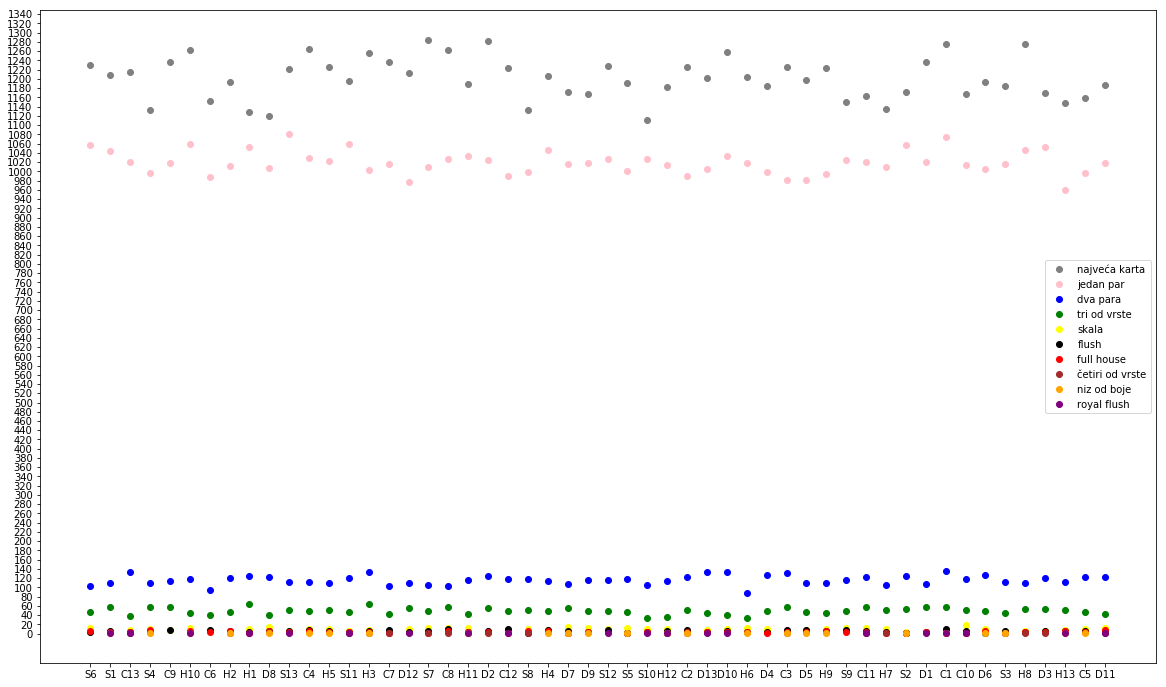

In [108]:
plt.figure(figsize=(20,12))
plt.yticks(np.arange(0,1400,20))
plt.plot(cards_0.keys(),cards_0.values(),'o',color='grey',label='najveća karta')
plt.plot(cards_1.keys(),cards_1.values(),'o',color='pink',label='jedan par')
plt.plot(cards_2.keys(),cards_2.values(),'o',color='blue',label='dva para')
plt.plot(cards_3.keys(),cards_3.values(),'o',color='green',label='tri od vrste')
plt.plot(cards_4.keys(),cards_4.values(),'o',color='yellow',label='skala')
plt.plot(cards_5.keys(),cards_5.values(),'o',color='black',label='flush')
plt.plot(cards_6.keys(),cards_6.values(),'o',color='red',label='full house')
plt.plot(cards_7.keys(),cards_7.values(),'o',color='brown',label='četiri od vrste')
plt.plot(cards_8.keys(),cards_8.values(),'o',color='orange',label='niz od boje')
plt.plot(cards_9.keys(),cards_9.values(),'o',color='purple',label='royal flush')
plt.legend(loc='best')

Najveća koncentracija svih karata je u kombinaciji NAJVEĆA KARTA,zatim u kombinaciji JEDAN PAR. 
S obzirom na prethodni graf, očekivali smo ovakvu distribuciju. U obe kombinacije su prisutne sve karte, neke više neke manje, ali ne možemo reći da postoji nekakav uzorak po kojem se karte dobivaju, samo po sudbini, sreći :)   

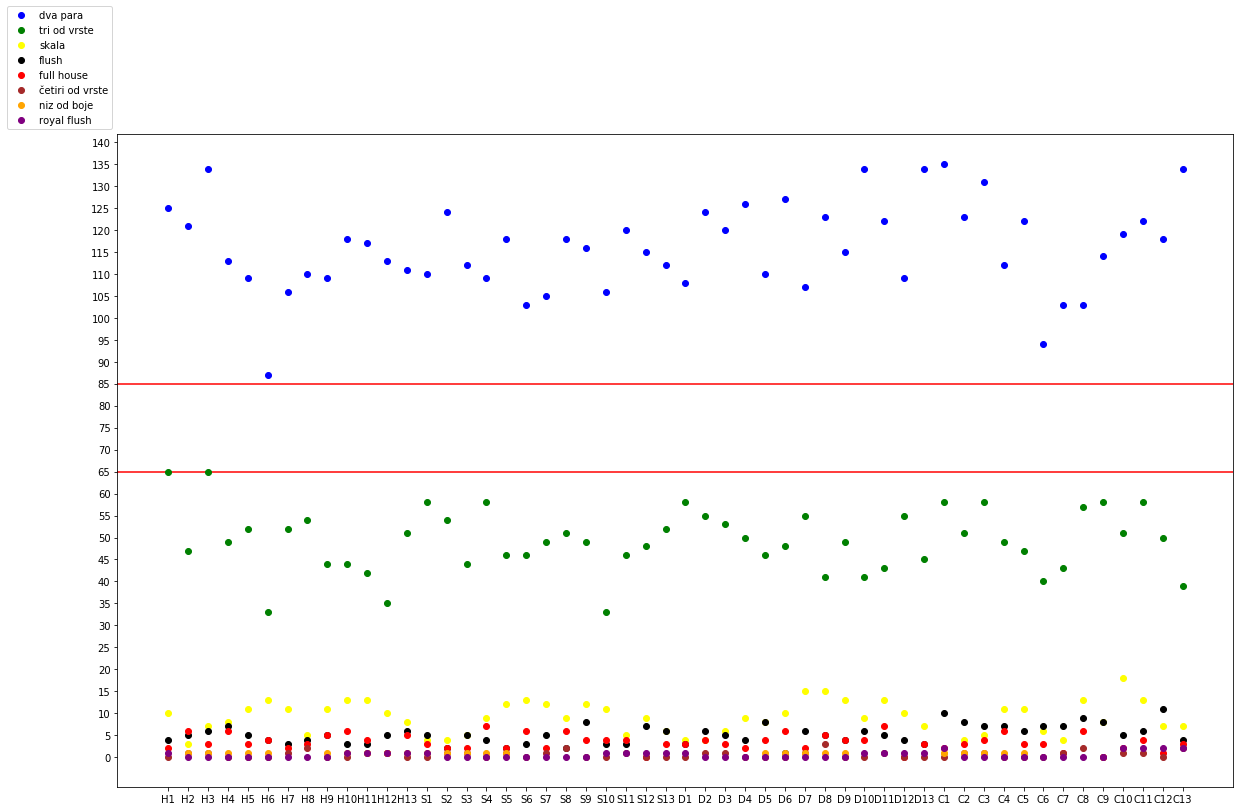

In [95]:
plt.figure(figsize=(20,12))
plt.yticks(np.arange(0,200,5))
plt.axhline(y=65, color='red')
plt.axhline(y=85, color='red')
plt.plot(cards_2.keys(),cards_2.values(),'o',color='blue',label='dva para')
plt.plot(cards_3.keys(),cards_3.values(),'o',color='green',label='tri od vrste')
plt.plot(cards_4.keys(),cards_4.values(),'o',color='yellow',label='skala')
plt.plot(cards_5.keys(),cards_5.values(),'o',color='black',label='flush')
plt.plot(cards_6.keys(),cards_6.values(),'o',color='red',label='full house')
plt.plot(cards_7.keys(),cards_7.values(),'o',color='brown',label='četiri od vrste')
plt.plot(cards_8.keys(),cards_8.values(),'o',color='orange',label='niz od boje')
plt.plot(cards_9.keys(),cards_9.values(),'o',color='purple',label='royal flush')
plt.legend(loc='lower right',bbox_to_anchor=(0,1))

Radi prevelike razdiobe u pojavljivanju karata, u ovom grafu smo prikazali sve kombinacije karata isključujući najveću kartu i jedan par.
Kao što vidimo najviša koncentracija karata je u kombinaciji dva para, njoj najbliža je tri od vrste. Vidimo da se plava skupina točkica(dva para) značajno odmakla od zelene skupine(tri od vrste), i to za minimalno 15 pojavljvanja karata, te se nijedna karta ne pojavljuje češće kod zelenih. 

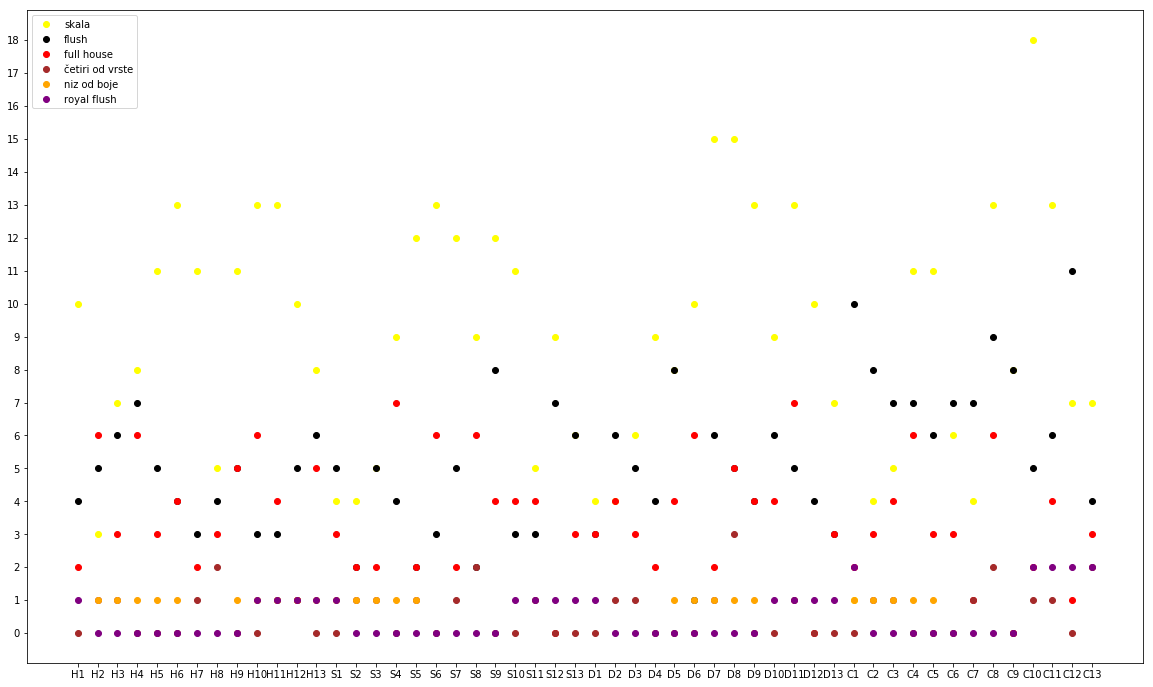

In [81]:
plt.figure(figsize=(20,12))
plt.yticks(np.arange(0,200,1))
plt.plot(cards_4.keys(),cards_4.values(),'o',color='yellow',label='skala')
plt.plot(cards_5.keys(),cards_5.values(),'o',color='black',label='flush')
plt.plot(cards_6.keys(),cards_6.values(),'o',color='red',label='full house')
plt.plot(cards_7.keys(),cards_7.values(),'o',color='brown',label='četiri od vrste')
plt.plot(cards_8.keys(),cards_8.values(),'o',color='orange',label='niz od boje')
plt.plot(cards_9.keys(),cards_9.values(),'o',color='purple',label='royal flush')
plt.legend()

Ovdje smo prikazali kombinacije sa najmanjim koeficijentima pojavljivanja. U prethodna dva grafa smo mogli točno razlučiti skupove koji u svim segmentima(kartama) imaju najveći broj pojavljivanja, ovdje to nije moguće. Jedan od razloga je taj što se sve karte ne pojavljuju u svim kombinacijima.
Iz grafa možemo zaključiti da je kombinacija sa najvećim koeficijentom pojavljivanja skala bez boje. Ali unatoč tome ona ne sadrži najveći broj pojavljivanja u svakoj karti, npr. kod 2H(dvojka srca)njen broj pojavljivanja u skali bez boje je 2, dok je kod flusha 5, a kod full housa 6.
Elemente na grafu bi mogli, ne eksplicitno, podjeliti u dvije skupine. Imamo neka preklapanja skupova. 
Prva skupina bi sadržavala žute,crne i crvene točkice(skala bez boje, flush, full house), a druga skupina smeđe, naračaste i ljubičaste(4 od vrste,niz od boje,royal flash). Prva skupina nosi manje bodova, sli je vjerojatnost njenog pojavljivanja veća, dok druga skupina nosi više bodova ali ju je 'teže dobiti'.
Unutar ove dvije skupine je gotovo nemoguće napraviti podskupine. Ako i neznamo što koja boja označava možemo zaključiti da se ljubičaste i narančaste oznake odnose na neke nizove, tj. skale. npr. vidimo uzorak D2-D9, S2-S5

### Grafički prikaz vjerojatnosti dobivanja svake karte (po poher hands)

([<matplotlib.patches.Wedge at 0x2204b546080>,
 [Text(1.0978925058472204, 0.06805913314545932, 'S6'),
  Text(1.0813152286608394, 0.20188456173307823, 'S1'),
  Text(1.04877184564944, 0.3317794685827737, 'C13'),
  Text(1.0024246047594765, 0.4529292569185695, 'S4'),
  Text(0.9415096057216389, 0.5688230501077502, 'C9'),
  Text(0.8628136736370011, 0.6823141245680194, 'H10'),
  Text(0.7737875460926915, 0.7818266006678533, 'C6'),
  Text(0.676331088567318, 0.8675115322791661, 'H2'),
  Text(0.5705976418233495, 0.9404351817885339, 'H1'),
  Text(0.4608553215193358, 0.9988054728661182, 'D8'),
  Text(0.34033950809050306, 1.0460253434944655, 'S13'),
  Text(0.20718437687527258, 1.080312285396591, 'C4'),
  Text(0.0705712177566314, 1.0977338945410888, 'H5'),
  Text(-0.06328233924625243, 1.0981781938918302, 'S11'),
  Text(-0.19783170499064234, 1.0820640537881736, 'H3'),
  Text(-0.3315949586018118, 1.0488301976153542, 'C7'),
  Text(-0.4579400248471387, 1.0001454562427419, 'D12'),
  Text(-0.57955825421878

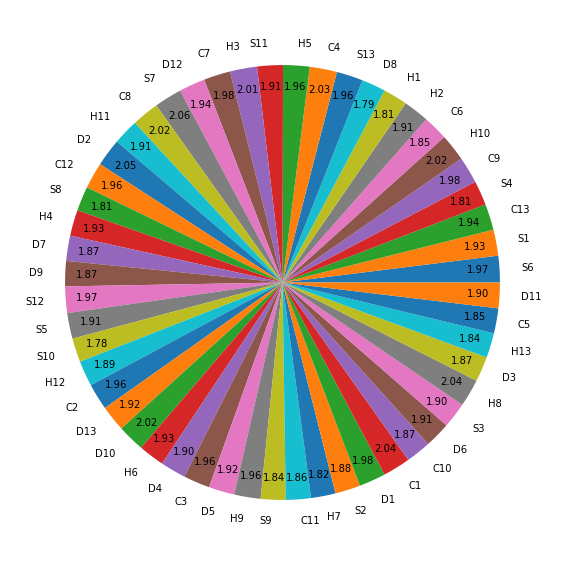

In [232]:
total_0=sum(cards_0[i] for i in cards_0)#računamo ukupnu sumu izvučenih karata, ona nam treba da izračunamo vjerojatnost za svaku kartu
vjerojatnosti_0=dict((str(i),(cards_0[i]/total_0)*100) for i in cards_0)#računamo vjerojatnost izvlačenja svake karte u ovoj kombinaciji

plt.figure(figsize=(10,10))
plt.title('Najveća karta')
plt.pie(vjerojatnosti_0.values(),labels=vjerojatnosti_0.keys(),autopct='%.2f',pctdistance=0.9)

In [ ]:
total_1=sum(cards_1[i] for i in cards_1)
vjerojatnosti_1=dict((str(i),(cards_1[i]/total_1)*100) for i in cards_1)

plt.figure(figsize=(10,10))
plt.title('Jedan par')
plt.pie(vjerojatnosti_1.values(),labels=vjerojatnosti_1.keys(),autopct='%.2f',pctdistance=0.9)

([<matplotlib.patches.Wedge at 0x2204b779828>,
 [Text(1.0982267739088767, 0.06243358927453437, 'H5'),
  Text(1.081554277544366, 0.20059996192792354, 'D13'),
  Text(1.0470440863699846, 0.337192350443548, 'S13'),
  Text(1.0023194207271515, 0.4531619785829209, 'S7'),
  Text(0.9418493640688417, 0.5682603060245532, 'C5'),
  Text(0.865398590473084, 0.6790326057025536, 'H4'),
  Text(0.781657635120063, 0.7739582297892508, 'D1'),
  Text(0.6880128290907846, 0.8582763814800539, 'C4'),
  Text(0.5721808273209402, 0.9394727781294808, 'C1'),
  Text(0.4426933953971265, 1.0069868706551062, 'S11'),
  Text(0.3163983640201334, 1.053514155218326, 'D9'),
  Text(0.18706091633085706, 1.0839779580699325, 'H11'),
  Text(0.06186128499506662, 1.0982591594968645, 'C8'),
  Text(-0.06758253753155968, 1.097921946506579, 'D8'),
  Text(-0.19834571767739104, 1.0819699516525592, 'D7'),
  Text(-0.3191419018906814, 1.0526863001187006, 'H8'),
  Text(-0.4353370430245714, 1.0101889224153187, 'H7'),
  Text(-0.5500001375035029,

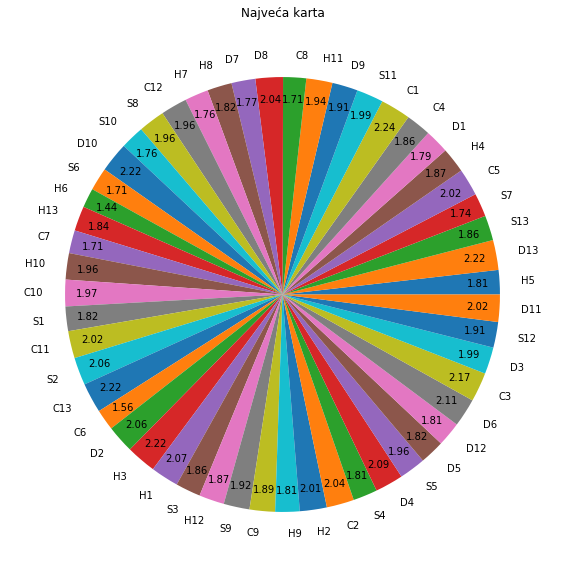

In [234]:
total_2=sum(cards_2[i] for i in cards_2)
vjerojatnosti_2=dict((str(i),(cards_2[i]/total_2)*100) for i in cards_2)

plt.figure(figsize=(10,10))
plt.title('Dva para')
plt.pie(vjerojatnosti_2.values(),labels=vjerojatnosti_2.keys(),autopct='%.2f',pctdistance=0.9)

In [213]:
total_3=sum(cards_3[i] for i in cards_3)
vjerojatnosti_3=dict((str(i),(cards_3[i]/total_3)*100) for i in cards_3)

plt.figure(figsize=(10,10))
plt.title('Tri od vrste')
plt.pie(vjerojatnosti_3.values(),labels=vjerojatnosti_3.keys(),autopct='%.2f',pctdistance=0.9)

1.919048966883668

In [ ]:
total_4=sum(cards_4[i] for i in cards_4)
vjerojatnosti_4=dict((str(i),(cards_4[i]/total_4)*100) for i in cards_4)

plt.figure(figsize=(10,10))
plt.title('Skala bez boje')
plt.pie(vjerojatnosti_4.values(),labels=vjerojatnosti_4.keys(),autopct='%.2f',pctdistance=0.9)

In [ ]:
total_5=sum(cards_5[i] for i in cards_5)
vjerojatnosti_5=dict((str(i),(cards_5[i]/total_5)*100) for i in cards_5)

plt.figure(figsize=(10,10))
plt.title('flush')
plt.pie(vjerojatnosti_5.values(),labels=vjerojatnosti_5.keys(),autopct='%.2f',pctdistance=0.9)

In [ ]:
total_6=sum(cards_6[i] for i in cards_6)
vjerojatosti_6=dict((str(i),(cards_6[i]/total_6)*100) for i in cards_6)

plt.figure(figsize=(10,10))
plt.title('Full house')
plt.pie(vjerojatnosti_6.values(),labels=vjerojatnosti_6.keys(),autopct='%.2f',pctdistance=0.9)

In [ ]:
total_7=sum(cards_7[i] for i in cards_7)
vjerojatnosti_7=dict((str(i),(cards_7[i]/total_7)*100) for i in cards_7)

plt.figure(figsize=(10,10))
plt.title('četiri od vrste')
plt.pie(vjerojatnosti_7.values(),labels=vjerojatnosti_7.keys(),autopct='%.2f',pctdistance=0.9)

In [ ]:
total_8=sum(cards_8[i] for i in cards_8)
vjerojatnosti_8=dict((str(i),(cards_8[i]/total_8)*100) for i in cards_8)

plt.figure(figsize=(10,10))
plt.title('skala od boje')
plt.pie(vjerojatnosti_8.values(),labels=vjerojatnosti_8.keys(),autopct='%.2f',pctdistance=0.9)

In [ ]:
total_9=sum(cards_9[i] for i in cards_9)
vjerojatnosti_9=dict((str(i),(cards_9[i]/total_9)*100) for i in cards_9)

plt.figure(figsize=(10,10))
plt.title('royal flush')
plt.pie(vjerojatnosti_9.values(),labels=vjerojatnosti_9.keys(),autopct='%.2f',pctdistance=0.9)